<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Loading the training dataset
df = pd.read_csv('train.csv')

# Preview the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Overview of Ames Housing Dataset**

The House Prices: Advanced Regression Techniques dataset on Kaggle is a comprehensive collection of data on residential homes in Ames, Iowa. The goal of the competition is to predict the final sale price of each home based on its characteristics.

The dataset includes 79 explanatory variables that describe nearly every aspect of the homes, from general living area and number of rooms to more specific details like the type of alley access and proximity to a railroad. This makes it an ideal dataset for practicing a wide range of machine learning techniques, particularly advanced regression methods like random forests and gradient boosting.

The dataset is broken down into two main files: train.csv and test.csv.
1. train.csv: Contains the training data with the target variable SalePrice, which is what you need to predict. It includes 1460 rows and 81 columns (the 80 features and the target variable).

2. test.csv: Contains the test data with 1459 rows and 80 columns. It is missing the SalePrice variable, as this is the set on which you must make your predictions.


Data Overview
1. Target Variable: SalePrice — the price a house was sold for.

2. Observations: 1,460 houses in the training set.

3. Features: 79 explanatory variables describing each house.

Data Fields:

1. Location and Zoning
Neighborhood: Physical locations within Ames city boundaries.

MSZoning: General zoning classification (e.g., residential, commercial).

2. Lot and Property Size
LotArea: Lot size in square feet.

LotFrontage: Linear feet of street connected to property.

LotShape: General shape of the lot (e.g., regular, irregular).

3. Building and Construction
YearBuilt: Original construction date.

YearRemodAdd: Remodel date (if applicable).

Foundation: Type of foundation (e.g., concrete, stone).

RoofStyle: Type of roof (e.g., gable, hip).

Exterior1st / Exterior2nd: Exterior covering materials.

4. Rooms and Interior Features
BedroomAbvGr: Number of bedrooms above ground.

TotRmsAbvGrd: Total rooms above ground (excluding bathrooms).

FullBath / HalfBath: Number of full and half bathrooms.

KitchenAbvGr: Number of kitchens above ground.

KitchenQual: Kitchen quality rating.

5. Quality and Condition Ratings
OverallQual: Overall material and finish quality (scale 1–10).

OverallCond: Overall condition rating (scale 1–10).

ExterQual / ExterCond: Exterior quality and condition.

BsmtQual / BsmtCond: Basement quality and condition.

HeatingQC: Heating quality and condition.

6. Basement and Garage
TotalBsmtSF: Total square feet of basement area.

GarageCars: Size of garage in car capacity.

GarageArea: Size of garage in square feet.

GarageType: Type of garage (attached, detached, etc.).

GarageFinish: Interior finish of the garage.

7. Extra Amenities
Fireplaces: Number of fireplaces.

PoolArea: Pool area in square feet.

Fence: Type of fence (if any).

MiscFeature: Miscellaneous features (e.g., shed, elevator).

8. Sale Information
YrSold: Year the house was sold.

MoSold: Month the house was sold.

SaleType: Type of sale (e.g., normal, foreclosure).

SaleCondition: Condition of sale (e.g., partial, family).

9. Target Variable
SalePrice: The final sale price of the house — this is what you're trying to predict

**Checking the data**

In [3]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('train.csv')  # Replace with your actual path if needed

df.head()

# Checking data types of each column
df.dtypes.value_counts()

# List of numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

target = 'SalePrice'
print(f"Target variable: {target}")

# Summary statistics for numerical features
df[numerical_features].describe().T

Numerical Features:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Dealing with Missing Values**

Dropped columns: ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'PoolQC']
Remaining shape after cleaning: (1459, 63)


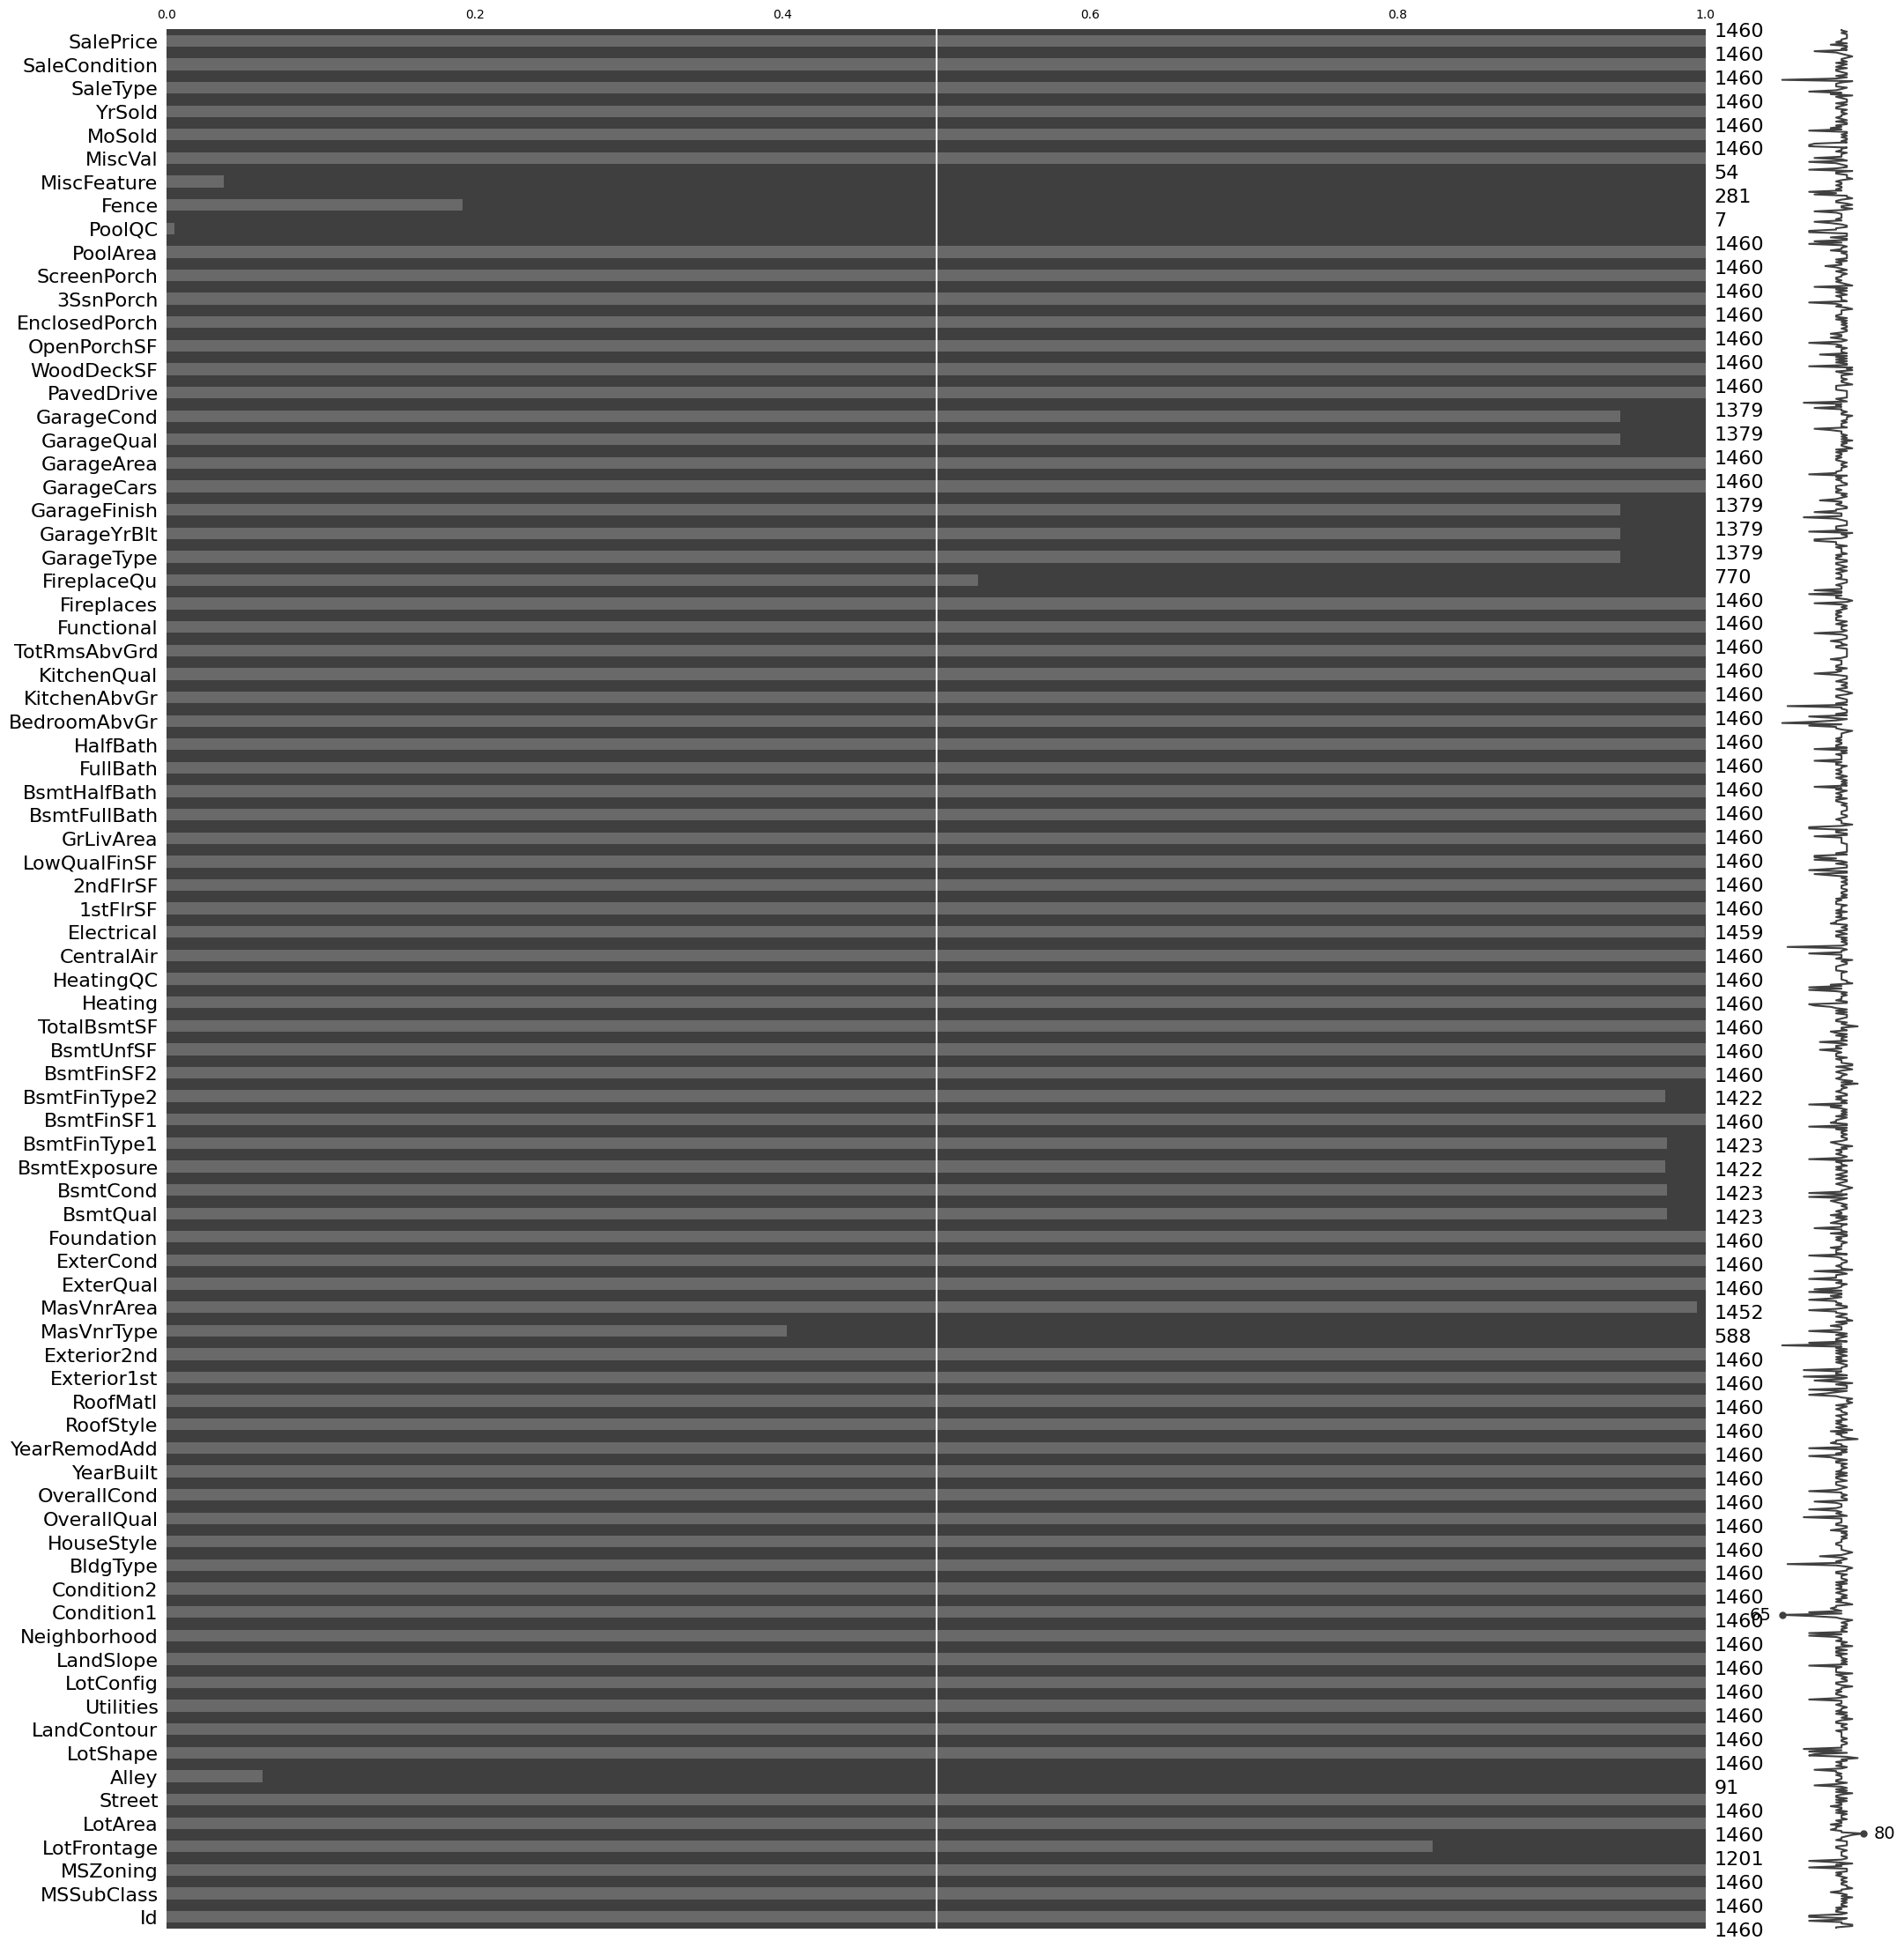

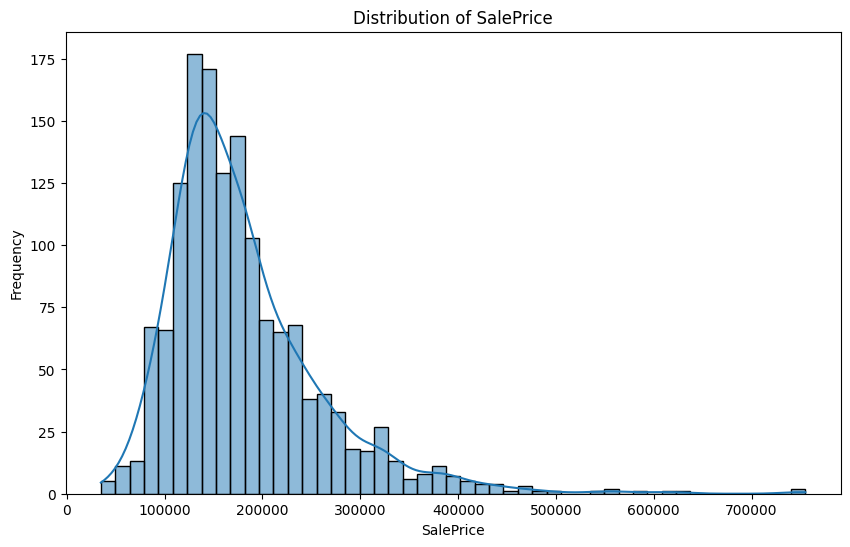

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Total missing values per column
missing_counts = df.isnull().sum()

# Filtering only columns with missing values
missing_counts = missing_counts[missing_counts > 0]
missing_counts.sort_values(ascending=False)

# Visualizing missing values
msno.matrix(df)
msno.bar(df)

# Calculating missing ratio
missing_ratio = (df.isnull().sum() / len(df)).sort_values(ascending=False)

# Combining into a summary DataFrame
missing_summary = pd.DataFrame({
    'Total': df.isnull().sum(),
    'Missing_Ratio': missing_ratio
})

# Filtering only columns with missing values
missing_summary = missing_summary[missing_summary['Total'] > 0]
missing_summary

# Dropping columns with 5 or more missing values
cols_to_drop = missing_summary[missing_summary['Total'] >= 5].index.tolist()
df_cleaned = df.drop(columns=cols_to_drop)

print(f"Dropped columns: {cols_to_drop}")

# Dropping rows with any remaining missing values
df_cleaned = df_cleaned.dropna()

print(f"Remaining shape after cleaning: {df_cleaned.shape}")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

**Researching Kurtosis and Skewness**

Skewness

Skewness measures the asymmetry of a distribution around its mean.

***Zero skewness: The distribution is symmetrical (e.g., normal distribution).

***Positive skew (right-skewed): The right tail is longer; extreme high values pull the mean to the right.

Mean > Median

***Negative skew (left-skewed): The left tail is longer; extreme low values pull the mean to the left.

Mean < Median

Skewness helps identify whether your data is biased toward higher or lower values. It’s especially useful when checking assumptions for statistical models.

Kurtosis

Kurtosis measures the tailedness of a distribution — how often extreme values (outliers) occur.

***Mesokurtic: Normal-tailed distribution (kurtosis ≈ 3)

***Leptokurtic: Heavy tails, more outliers (kurtosis > 3)

***Platykurtic: Light tails, fewer outliers (kurtosis < 3)

Kurtosis doesn’t measure the peak of a distribution, but rather how thick or thin the tails are compared to a normal distribution. It’s useful for understanding the risk of extreme deviations.

**Confirming Distribution**

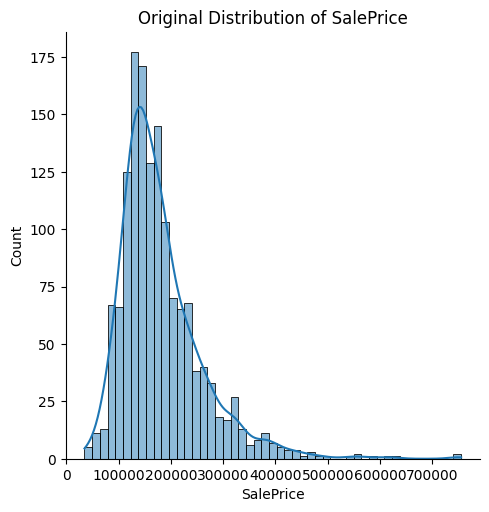

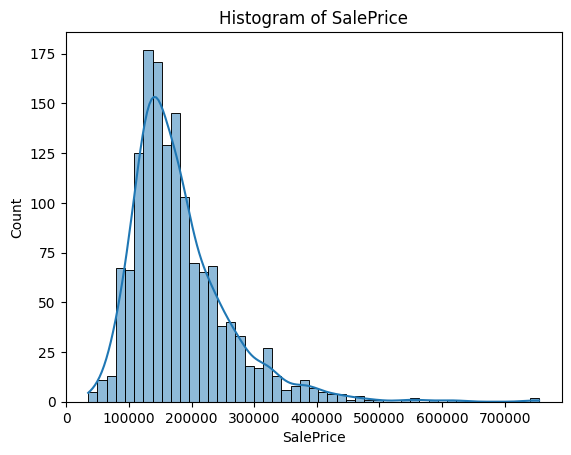

Original Skewness: 1.8828757597682129
Original Kurtosis: 6.536281860064529


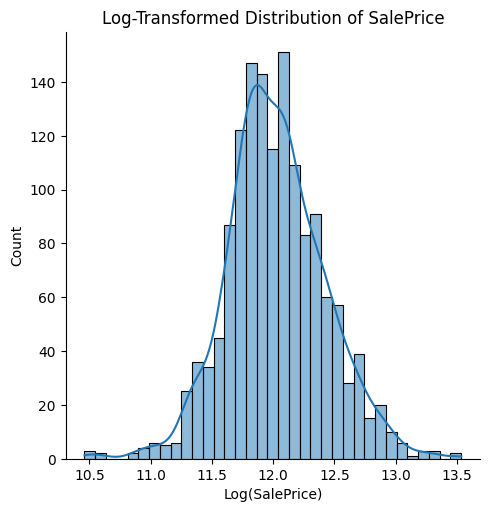

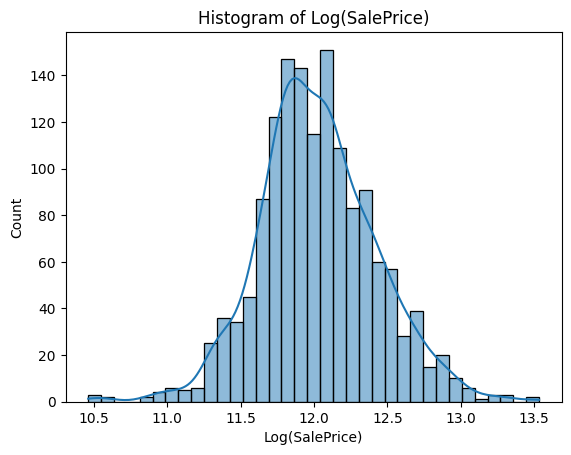

Log-Transformed Skewness: 0.12133506220520406
Log-Transformed Kurtosis: 0.8095319958036296


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original distribution
sns.displot(df['SalePrice'], kde=True)
plt.title("Original Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.show()

sns.histplot(df['SalePrice'], kde=True)
plt.title("Histogram of SalePrice")
plt.xlabel("SalePrice")
plt.show()

# Calculate skewness and kurtosis
print("Original Skewness:", df['SalePrice'].skew())
print("Original Kurtosis:", df['SalePrice'].kurt())

import numpy as np

# Apply log transformation
df['LogSalePrice'] = np.log(df['SalePrice'])

# Plot transformed distribution
sns.displot(df['LogSalePrice'], kde=True)
plt.title("Log-Transformed Distribution of SalePrice")
plt.xlabel("Log(SalePrice)")
plt.show()

sns.histplot(df['LogSalePrice'], kde=True)
plt.title("Histogram of Log(SalePrice)")
plt.xlabel("Log(SalePrice)")
plt.show()

# Recalculate Skewness and Kurtosis
print("Log-Transformed Skewness:", df['LogSalePrice'].skew())
print("Log-Transformed Kurtosis:", df['LogSalePrice'].kurt())

**Confirming the Correlation Coeffient**

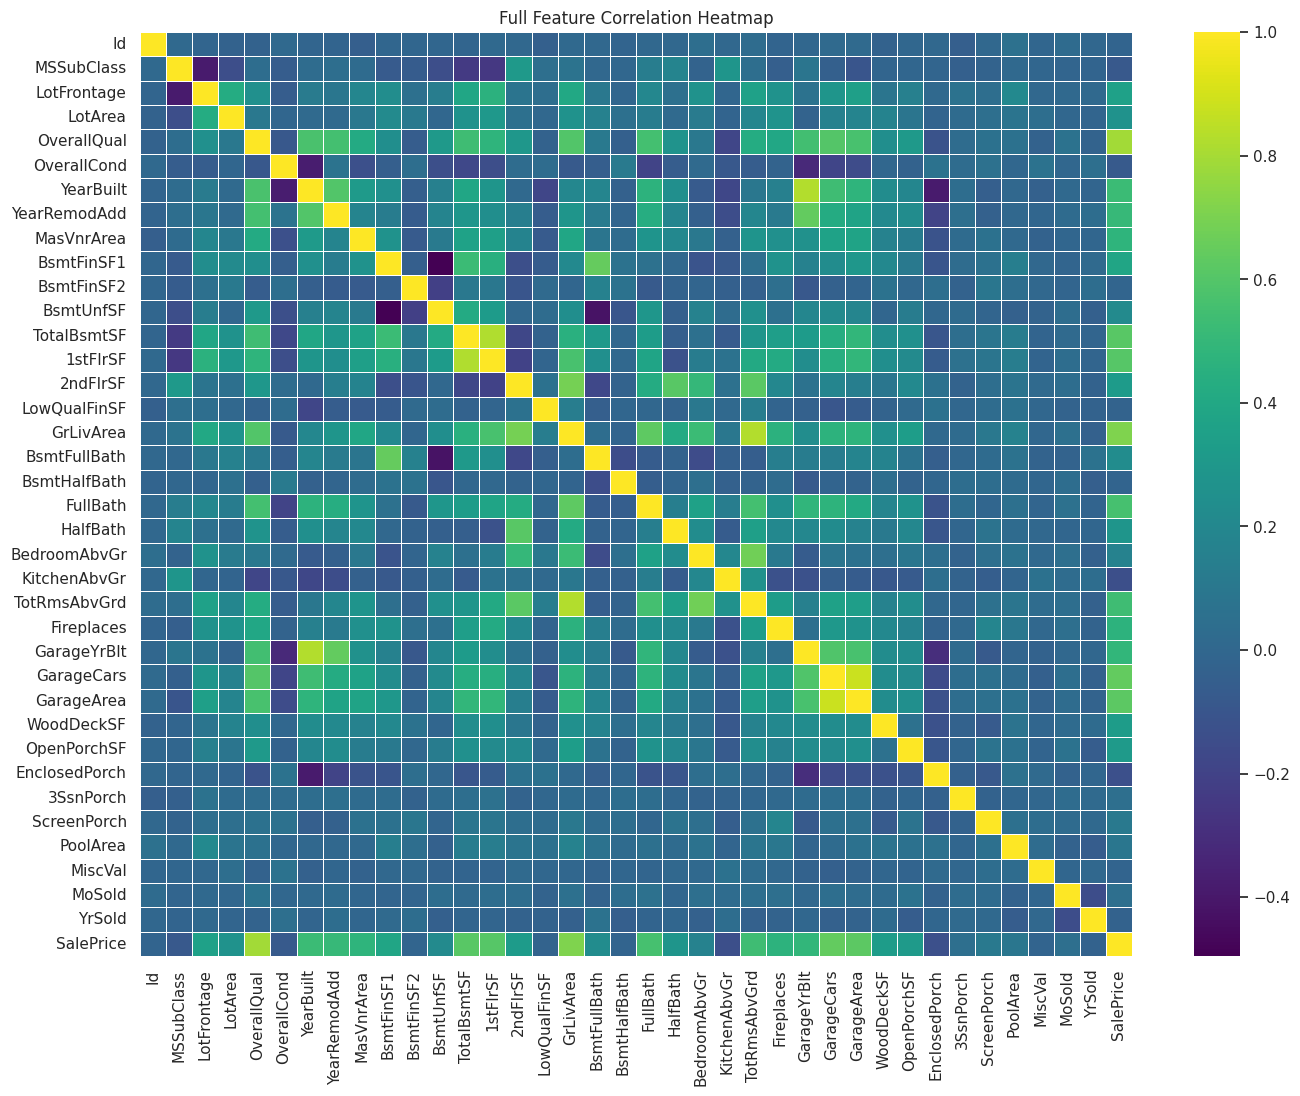

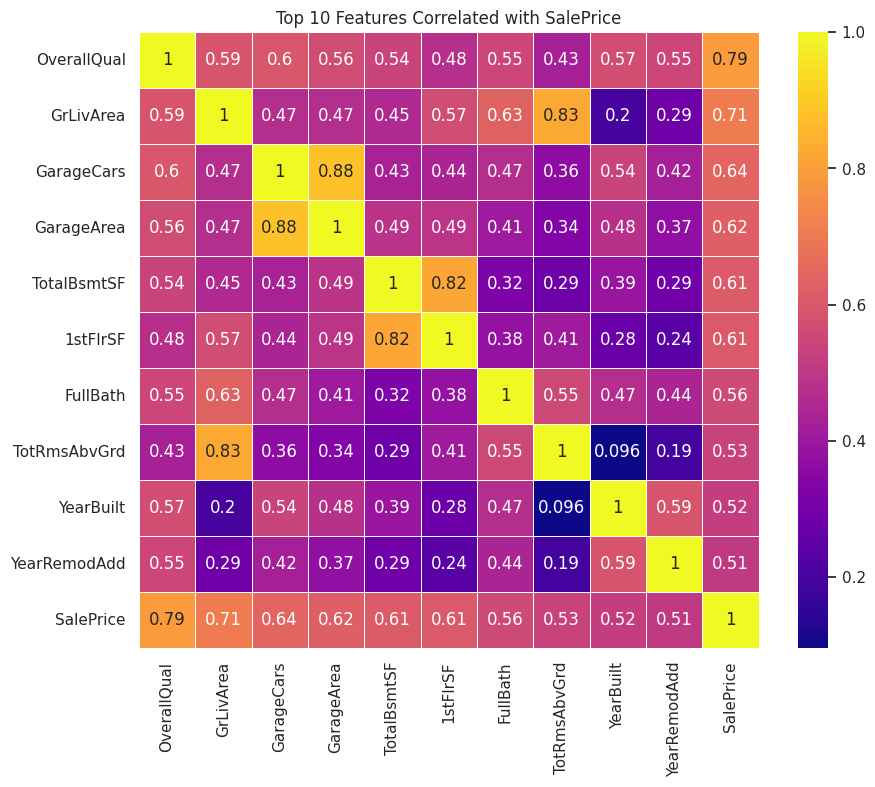

Top 10 features most correlated with SalePrice:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

Highly correlated feature pairs among the top 10:
GrLivArea and TotRmsAbvGrd: correlation = 0.83
GarageCars and GarageArea: correlation = 0.88
TotalBsmtSF and 1stFlrSF: correlation = 0.82


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Setting seaborn style
sns.set(style="whitegrid")

# Loading dataset
df = pd.read_csv('train.csv')

# Computing correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Full correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='viridis', linewidths=0.5)
plt.title('Full Feature Correlation Heatmap')
plt.show()

# Identifying top 10 features most correlated with SalePrice
if "SalePrice" not in df.columns:
    raise KeyError("'SalePrice' column not found in dataset.")

top10_features = (
    corr_matrix['SalePrice']
    .abs()
    .sort_values(ascending=False)
    .iloc[1:11]
    .index
    .tolist()
)

# Creating heatmap for top 10 correlated features
top10_corr_matrix = df[top10_features + ['SalePrice']].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(top10_corr_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()

# Find highly correlated pairs among top 10 features
high_corr_pairs = []
threshold = 0.75
for i in range(len(top10_features)):
    for j in range(i + 1, len(top10_features)):
        f1, f2 = top10_features[i], top10_features[j]
        corr_value = top10_corr_matrix.loc[f1, f2]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((f1, f2, corr_value))

print("Top 10 features most correlated with SalePrice:")
print(top10_features)
print("\nHighly correlated feature pairs among the top 10:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
